In [1]:
def DocString():
    """
    Create a contour or filled contour plot with extensive customization options.

    Parameters:
    -----------
    ax : matplotlib.axes.Axes
        The matplotlib Axes object where the contour plot will be drawn.

    PlotData : 2D array-like
        The 2D data array to contour.

    xTickLabels : 1D array-like
        The x coordinates corresponding to the columns of PlotData.

    yTickLabels : 1D array-like
        The y coordinates corresponding to the rows of PlotData.

    contour_type : str, optional
        Specify the type of contour plot:
        - 'line' for contour lines (ax.contour),
        - 'fill' for filled contours (ax.contourf).
        Default is None (no plot).

    num_xticks : int, optional
        Number of x-axis ticks to display. If None, default matplotlib ticks are used.

    round_xticks : int, optional
        Number of decimal places to round x-axis tick labels to.

    num_yticks : int, optional
        Number of y-axis ticks to display. If None, default matplotlib ticks are used.

    round_yticks : int, optional
        Number of decimal places to round y-axis tick labels to.

    add_colorbar : bool, optional
        Whether to add a colorbar to the plot.

    fig : matplotlib.figure.Figure, optional
        The figure object needed to add the colorbar.

    colorbar_label : str, optional
        Label string for the colorbar.

    xlabel : str, optional
        Label for the x-axis.

    ylabel : str, optional
        Label for the y-axis.

    solid_contour_labels : bool, optional
        If True and contour_type is 'line', adds contour line labels.

    solid_contour_round : int, optional
        Number of decimal places to round contour labels to.

    xtick_rotation : float or int, optional
        Rotation angle in degrees for x-axis tick labels.

    ytick_rotation : float or int, optional
        Rotation angle in degrees for y-axis tick labels.

    cbar_rotation : float or int, optional
        Rotation angle in degrees for colorbar tick labels.

    **kwargs :
        Additional keyword arguments passed directly to matplotlib's contour or contourf function.

    Returns:
    --------
    contour : QuadContourSet
        The matplotlib contour set object created by contour or contourf.
    """

In [ ]:
# #How to Import to Code Document
# import sys
# path=os.path.join(mainCodeDirectory,'Functions/')
# sys.path.append(path)

# import UltimateContourPlot
# from UltimateContourPlot import * # import UltimateContourPlot 

# # # Get all functions in NumericalFunctions
# # import inspect
# # functions = [f[0] for f in inspect.getmembers(NumericalFunctions, inspect.isfunction)]
# # functions

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# === Function ===
def UltimateContourPlot(
    ax, PlotData, xTickLabels, yTickLabels,
    contour_type=None,
    num_xticks=None, round_xticks=None, xTickInterval=None,
    num_yticks=None, round_yticks=None, yTickInterval=None,
    add_colorbar=False, fig=None, colorbar_label=None, colorbar_label_rotation=90,
    xlabel=None, ylabel=None, 
    solid_contour_labels=None,solid_contour_round=None,
    xtick_rotation=None,ytick_rotation=None,cbar_rotation=None,
    save_path=None, save_dpi=300,
    colorbar_kwargs=None,
    **kwargs,
):
    
    if contour_type=='line':
        contour = ax.contour(xTickLabels, yTickLabels, PlotData, **kwargs)
        if solid_contour_labels==True:
            fmt_num = solid_contour_round if solid_contour_round is not None else 1
            plt.clabel(contour, inline=True, fontsize=8, fmt=f"%.{fmt_num}f")
    elif contour_type=='fill':
        contour = ax.contourf(xTickLabels, yTickLabels, PlotData, **kwargs)
    # Colorbar
    cbar=None
    if add_colorbar and fig is not None:
        if colorbar_kwargs is None:
            colorbar_kwargs = {}
        cbar = fig.colorbar(contour, ax=ax, **colorbar_kwargs)
        if colorbar_label:
            cbar.set_label(colorbar_label)
            cbar.ax.yaxis.label.set_rotation(colorbar_label_rotation)
        if cbar_rotation is not None:
            for tick in cbar.ax.get_yticklabels():
                tick.set_rotation(cbar_rotation)

    # X-ticks
    if num_xticks is not None:
        if xTickInterval is not None:
            xticks = np.arange(0, xTickLabels.max()+1, xTickInterval)
        else:
            xticks = np.linspace(xTickLabels.min(), xTickLabels.max(), num_xticks)
        ax.set_xticks(xticks)
        ax.set_xticklabels(xticks)
        if round_xticks is not None:
            ax.set_xticklabels([f"{tick:.{round_xticks}f}" for tick in xticks])

    # Y-ticks
    if num_yticks is not None:
        if yTickInterval is not None:
            yticks = np.arange(0, yTickLabels.max()+1, yTickInterval)
        else:
            yticks = np.linspace(yTickLabels.min(), yTickLabels.max(), num_yticks)
        ax.set_yticks(yticks)
        if round_yticks is not None:
            ax.set_yticklabels([f"{tick:.{round_yticks}f}" for tick in yticks])

    # Axis labels
    if xlabel is not None:
        ax.set_xlabel(xlabel)
    if ylabel is not None:
        ax.set_ylabel(ylabel)

    # Tick Rotation
    if xtick_rotation is not None:
        plt.setp(ax.get_xticklabels(), rotation=xtick_rotation)
    if ytick_rotation is not None:
        plt.setp(ax.get_yticklabels(), rotation=ytick_rotation)
        
    # Single Figure Saving
    if save_path is not None:
        if fig is None:
            fig = ax.figure
        fig.savefig(save_path, dpi=save_dpi)
    return contour,cbar

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# === Function ===
def UltimateContourPlot(
    ax, PlotData, xTickLabels, yTickLabels,
    contour_type=None,
    num_xticks=None, round_xticks=None, xTickInterval=None,
    num_yticks=None, round_yticks=None, yTickInterval=None,
    add_colorbar=False, fig=None, colorbar_label=None, colorbar_label_rotation=90,
    xlabel=None, ylabel=None, 
    solid_contour_labels=None,solid_contour_round=None,
    xtick_rotation=None,ytick_rotation=None,cbar_rotation=None,
    save_path=None, save_dpi=300,
    colorbar_kwargs=None,
    **kwargs,
):
    
    if contour_type=='line':
        contour = ax.contour(xTickLabels, yTickLabels, PlotData, **kwargs)
        if solid_contour_labels==True:
            fmt_num = solid_contour_round if solid_contour_round is not None else 1
            plt.clabel(contour, inline=True, fontsize=8, fmt=f"%.{fmt_num}f")
    elif contour_type=='fill':
        contour = ax.contourf(xTickLabels, yTickLabels, PlotData, **kwargs)
    # Colorbar
    cbar=None
    if add_colorbar and fig is not None:
        if colorbar_kwargs is None:
            colorbar_kwargs = {}
        cbar = fig.colorbar(contour, ax=ax, **colorbar_kwargs)
        if colorbar_label:
            cbar.set_label(colorbar_label)
            cbar.ax.yaxis.label.set_rotation(colorbar_label_rotation)
        if cbar_rotation is not None:
            for tick in cbar.ax.get_yticklabels():
                tick.set_rotation(cbar_rotatizon)

    # X-ticks
    if num_xticks is not None:
        if xTickInterval is not None:
            xticks = np.arange(0, x.max()+1, xTickInterval)
        else:
            xticks = np.linspace(xTickLabels.min(), xTickLabels.max(), num_xticks)
        ax.set_xticks(xticks)
        ax.set_xticklabels(xticks)
        if round_xticks is not None:
            ax.set_xticklabels([f"{tick:.{round_xticks}f}" for tick in xticks])

    # Y-ticks
    if num_yticks is not None:
        if yTickInterval is not None:
            yticks = np.arange(0, y.max()+1, yTickInterval)
        else:
            yticks = np.linspace(yTickLabels.min(), yTickLabels.max(), num_yticks)
        ax.set_yticks(yticks)
        if round_yticks is not None:
            ax.set_yticklabels([f"{tick:.{round_yticks}f}" for tick in yticks])

    # Axis labels
    if xlabel is not None:
        ax.set_xlabel(xlabel)
    if ylabel is not None:
        ax.set_ylabel(ylabel)

    # Tick Rotation
    if xtick_rotation is not None:
        plt.setp(ax.get_xticklabels(), rotation=xtick_rotation)
    if ytick_rotation is not None:
        plt.setp(ax.get_yticklabels(), rotation=ytick_rotation)
        
    # Single Figure Saving
    if save_path is not None:
        if fig is None:
            fig = ax.figure
        fig.savefig(save_path, dpi=save_dpi)
    return contour,cbar

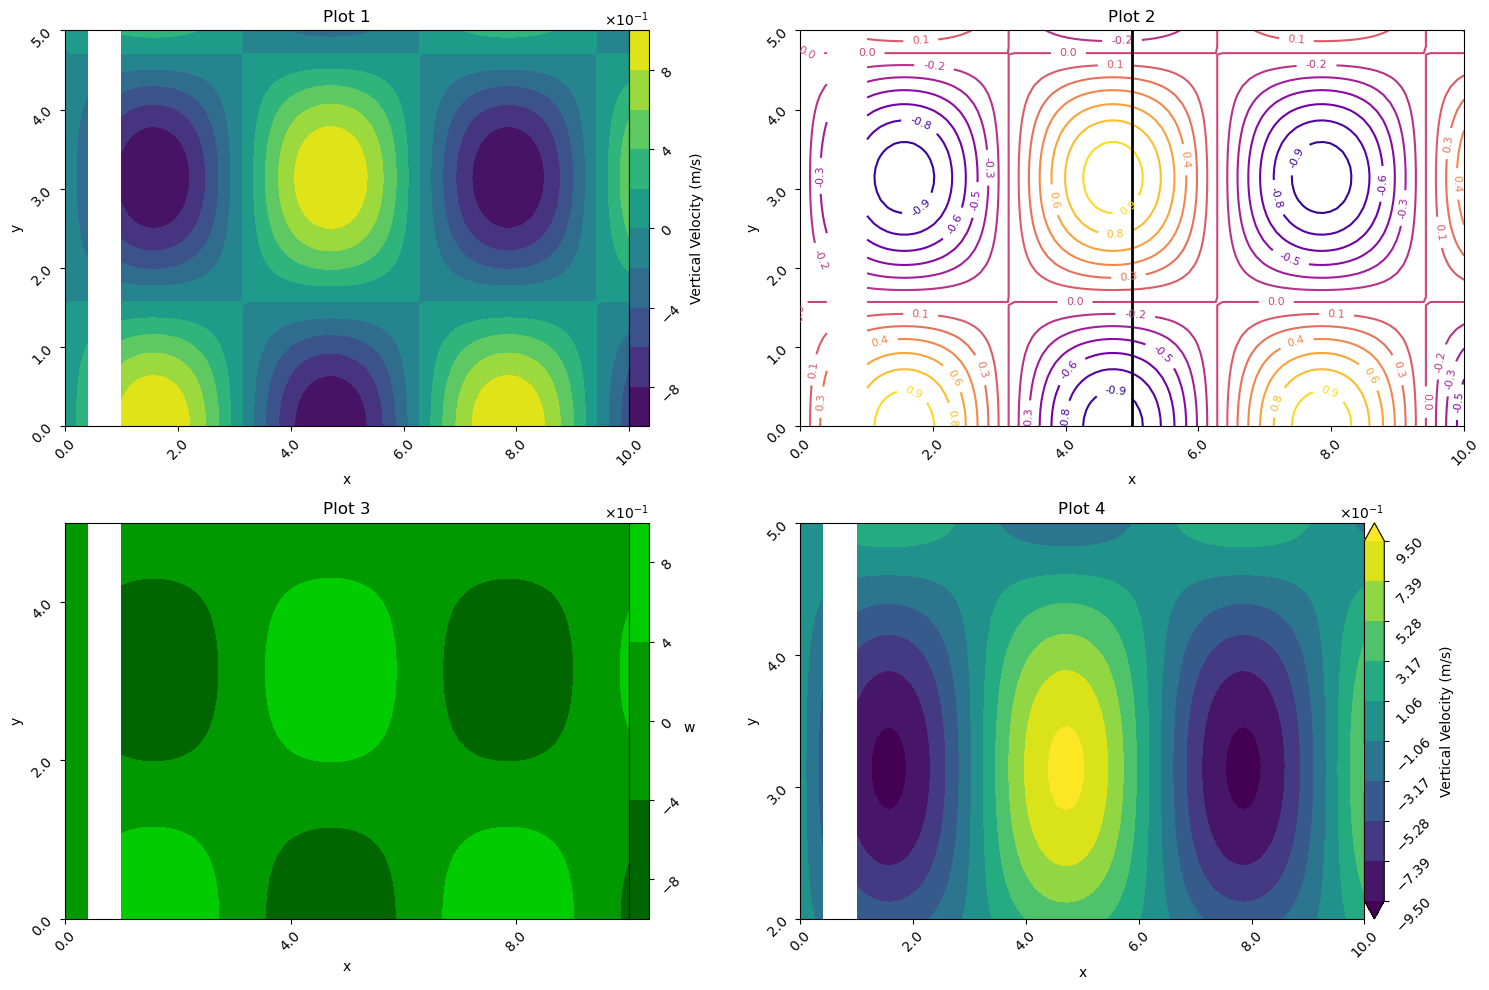

In [4]:
# === Data setup ===
x = np.linspace(0, 10, 100)
y = np.linspace(0, 5, 50)
X, Y = np.meshgrid(x, y)
Z = np.sin(X) * np.cos(Y)

Z[:,5:10]=np.nan

# === Create figure and subplots ===
fig, axs = plt.subplots(2, 2, figsize=(15, 10))

# === Base Plot configuration parameters ===
plot_kwargs = {
    'PlotData': Z, #THIS MUST BE SET SOMEWHERE
    'xTickLabels': x, 'yTickLabels': y, #THESE MUST BE SET SOMEWHERE
    'contour_type': 'fill',
    'num_xticks': 6,'round_xticks': 1, 'xTickInterval': None,
    'num_yticks': 6,'round_yticks': 1, 'yTickInterval': None,
    'add_colorbar': True,'fig': fig, 'levels': 10, 'colorbar_label_rotation': 90,
    'colorbar_label': "Vertical Velocity (m/s)",
    'xlabel': "x", 'ylabel': "y",
    'solid_contour_labels': True, 'solid_contour_round': 1,
    'xtick_rotation': 45, 'ytick_rotation': 45, 'cbar_rotation': 45,
    'save_path': None, 'save_dpi': 300,
    'colorbar_kwargs': {
            'extend': 'both'
        },
}

# === Plot 1 ===
plot_kwargs1 = plot_kwargs.copy()
plot_kwargs1['cmap'] = 'viridis'
plot_kwargs1['colorbar_kwargs']['pad'] = 0
[contour1,cbar1]=UltimateContourPlot(axs[0,0], **plot_kwargs1)
axs[0,0].set_title('Plot 1')


# === Plot 2 ===
plot_kwargs2 = plot_kwargs.copy()
plot_kwargs2['cmap'] = 'plasma'
plot_kwargs2['contour_type'] = 'line'
plot_kwargs2['add_colorbar'] = False
plot_kwargs2['levels'] = 15
[contour2,cbar2]=UltimateContourPlot(axs[0,1], **plot_kwargs2)
axs[0,1].set_title('Plot 2')
axs[0,1].axvline(5,color='black',linewidth=2)

# === Plot 3 ===
from matplotlib.colors import ListedColormap
my_colors = [
    (0.0, 0.4, 0.0),   # dark green
    (0.0, 0.6, 0.0),   # medium dark green
    (0.0, 0.8, 0.0)    # medium green
]
custom_cmap = ListedColormap(my_colors)

plot_kwargs3 = plot_kwargs.copy()
plot_kwargs3['cmap'] = custom_cmap
plot_kwargs3['contour_type'] = 'fill'
plot_kwargs3['add_colorbar'] = True
plot_kwargs3['colorbar_label'] = 'w'
plot_kwargs3['colorbar_label_rotation'] = 0
plot_kwargs3['xTickInterval']=4
plot_kwargs3['yTickInterval']=2
[contour3,cbar3]=UltimateContourPlot(axs[1,0], **plot_kwargs3)
axs[1,0].set_title('Plot 3')

# === Plot 4 ===
plot_kwargs4 = plot_kwargs.copy()
plot_kwargs4['cmap'] = 'viridis'
plot_kwargs4['levels'] = np.linspace(-1.5,1.5,10)
plot_kwargs4['levels'] = np.linspace(-0.95,0.95,10)
plot_kwargs4['extend'] = 'both'
[contour4,cbar4]=UltimateContourPlot(axs[1,1], **plot_kwargs4)
axs[1,1].set_title('Plot 4')
axs[1,1].set_ylim(2,5)

# === Final layout adjustments ===
plt.tight_layout()


#OTHER THINGS
def apply_scientific_notation_colorbar(cbars):
        from matplotlib.ticker import ScalarFormatter
        formatter = ScalarFormatter(useMathText=True)
        formatter.set_powerlimits((-1, 1))  # Adjust the range for scientific notation
        for cbar in cbars:  # These must be Colorbar instances
            cbar.formatter = formatter
            cbar.update_ticks()
apply_scientific_notation_colorbar([cbar1,cbar3,cbar4])

In [7]:
# #ADVANCED EXAMPLE (data not available)

# #NEW PLOTTING METHOD


# ######
# cmap1 = plt.cm.viridis
# cmap2 = plt.cm.seismic 
# n_levels=29
# ######

# ######
# vmax_shared = np.max([np.max(profile_array_e), np.max(profile_array_d)])
# norm_shared = mcolors.Normalize(vmin=0, vmax=vmax_shared)
# norm_shared = None #COMMENT OUT IF COLORBARS SHOULD BE SHARED
# ######

# # === Create figure and subplots ===
# # fig, axs = plt.subplots(2, 2, figsize=(15, 10))
# fig = plt.figure(figsize=(10, 8))
# from matplotlib.gridspec import GridSpec
# gs = GridSpec(2, 2, figure=fig)
# ax1 = fig.add_subplot(gs[0, 0])
# ax2 = fig.add_subplot(gs[0, 1])
# ax3 = fig.add_subplot(gs[1, 0])

# # === Base Plot configuration parameters ===
# plot_kwargs = {
#     'PlotData': None, #THIS MUST BE SET SOMEWHERE
#     'xTickLabels': None, 'yTickLabels': None, #THESE MUST BE SET SOMEWHERE
#     'contour_type': 'fill',
#     'num_xticks': 10,'round_xticks': 0, 'xTickInterval': 100,
#     'num_yticks': 15,'round_yticks': 2, 'yTickInterval': None,
#     'add_colorbar': True,'fig': fig, 'levels': 29, 'colorbar_label_rotation': 0, 'colorbar_label': None,
#     'xlabel': "t (timesteps)", 'ylabel': "z (km)",
#     'solid_contour_labels': True, 'solid_contour_round': None,
#     'xtick_rotation': 0, 'ytick_rotation': 0, 'cbar_rotation': 0,
#     'save_path': None, 'save_dpi': 300,
#     'colorbar_kwargs': {
#             'extend': 'both'
#         },

#     'norm': norm_shared
# }

# # === Plot 1 ===
# plot_data1 = profile_array_e.copy().T
# plot_data1[plot_data1==0]=np.nan
# y = data['zh'].data  # len 95
# x = np.arange(profile_array_e.shape[0])  # len 661
# plot_kwargs['xTickLabels'] = x
# plot_kwargs['yTickLabels'] = y

# plot_kwargs1 = plot_kwargs.copy()
# plot_kwargs1['PlotData'] = plot_data1
# plot_kwargs1['cmap'] = cmap1
# [contour1,cbar1]=UltimateContourPlot(ax1, **plot_kwargs1)
# ax1.set_ylim(0,20)
# ax1.set_title('Entrainment')

# # # === Plot 2 ===
# plot_data2 = profile_array_d.copy().T

# plot_data2[plot_data2==0]=np.nan
# plot_kwargs2 = plot_kwargs.copy()
# plot_kwargs2['PlotData'] = plot_data2
# plot_kwargs2['cmap'] = cmap1
# [contour2,cbar2]=UltimateContourPlot(ax2, **plot_kwargs2)
# ax2.set_ylim(0,20)
# ax2.set_title('Detrainment')

# # # === Plot 3 ===
# plot_data3 = profile_array_net.copy().T
# #######################################
# vmin=-np.max(abs(profile_array_net))/2; vmax=+np.max(abs(profile_array_net))
# percentile_vminmax=False
# if percentile_vminmax==True:
#     ####
#     vmin = np.percentile(profile_array_net[profile_array_net<0], 1)
#     vmax = np.percentile(profile_array_net[profile_array_net>0], 99)
#     ####    
# levels = np.linspace(vmin, vmax, n_levels)
# norm = mcolors.BoundaryNorm(boundaries=levels, ncolors=256)
# #######################################

# plot_data3[plot_data3==0]=np.nan
# plot_kwargs3 = plot_kwargs.copy()
# plot_kwargs3['PlotData'] = plot_data3
# plot_kwargs3['cmap'] = cmap2
# plot_kwargs3['norm'] = norm
# plot_kwargs3['levels'] = levels
# [contour3,cbar3]=UltimateContourPlot(ax3, **plot_kwargs3)
# ax3.set_ylim(0,20)
# ax3.set_title('Net Entrainment')



# ################################################################################
# #TIGHT PLOTTING LAYOUT
# plt.tight_layout()
# #APPLY SCIENTIFIC NOTATION
# def apply_scientific_notation_colorbar(cbars):
#     from matplotlib.ticker import ScalarFormatter
#     formatter = ScalarFormatter(useMathText=True)
#     formatter.set_powerlimits((-2, 2))  # Adjust the range for scientific notation
#     for cbar in cbars:  # These must be Colorbar instances
#         cbar.formatter = formatter
#         cbar.update_ticks()
# apply_scientific_notation_colorbar([cbar1,cbar2,cbar3])